<a href="https://colab.research.google.com/github/projectnkh/PC-final-project/blob/main/6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.3 MB/s eta 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [ ]:
from google.colab import files

In [ ]:
file=files.upload()

Saving diabetes (6).csv to diabetes (6).csv


In [ ]:
import io

In [ ]:
df=pd.read_csv(io.BytesIO(file['diabetes (6).csv']))

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
len(df.index)

768

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
len(df.index)

768

In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


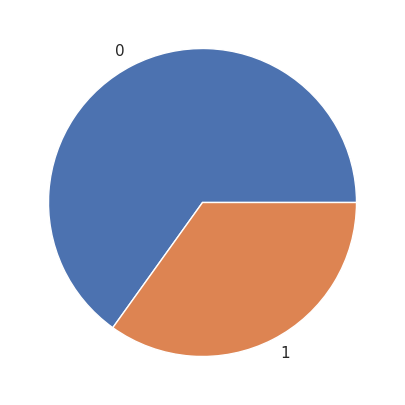

In [ ]:
y =df['Outcome']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

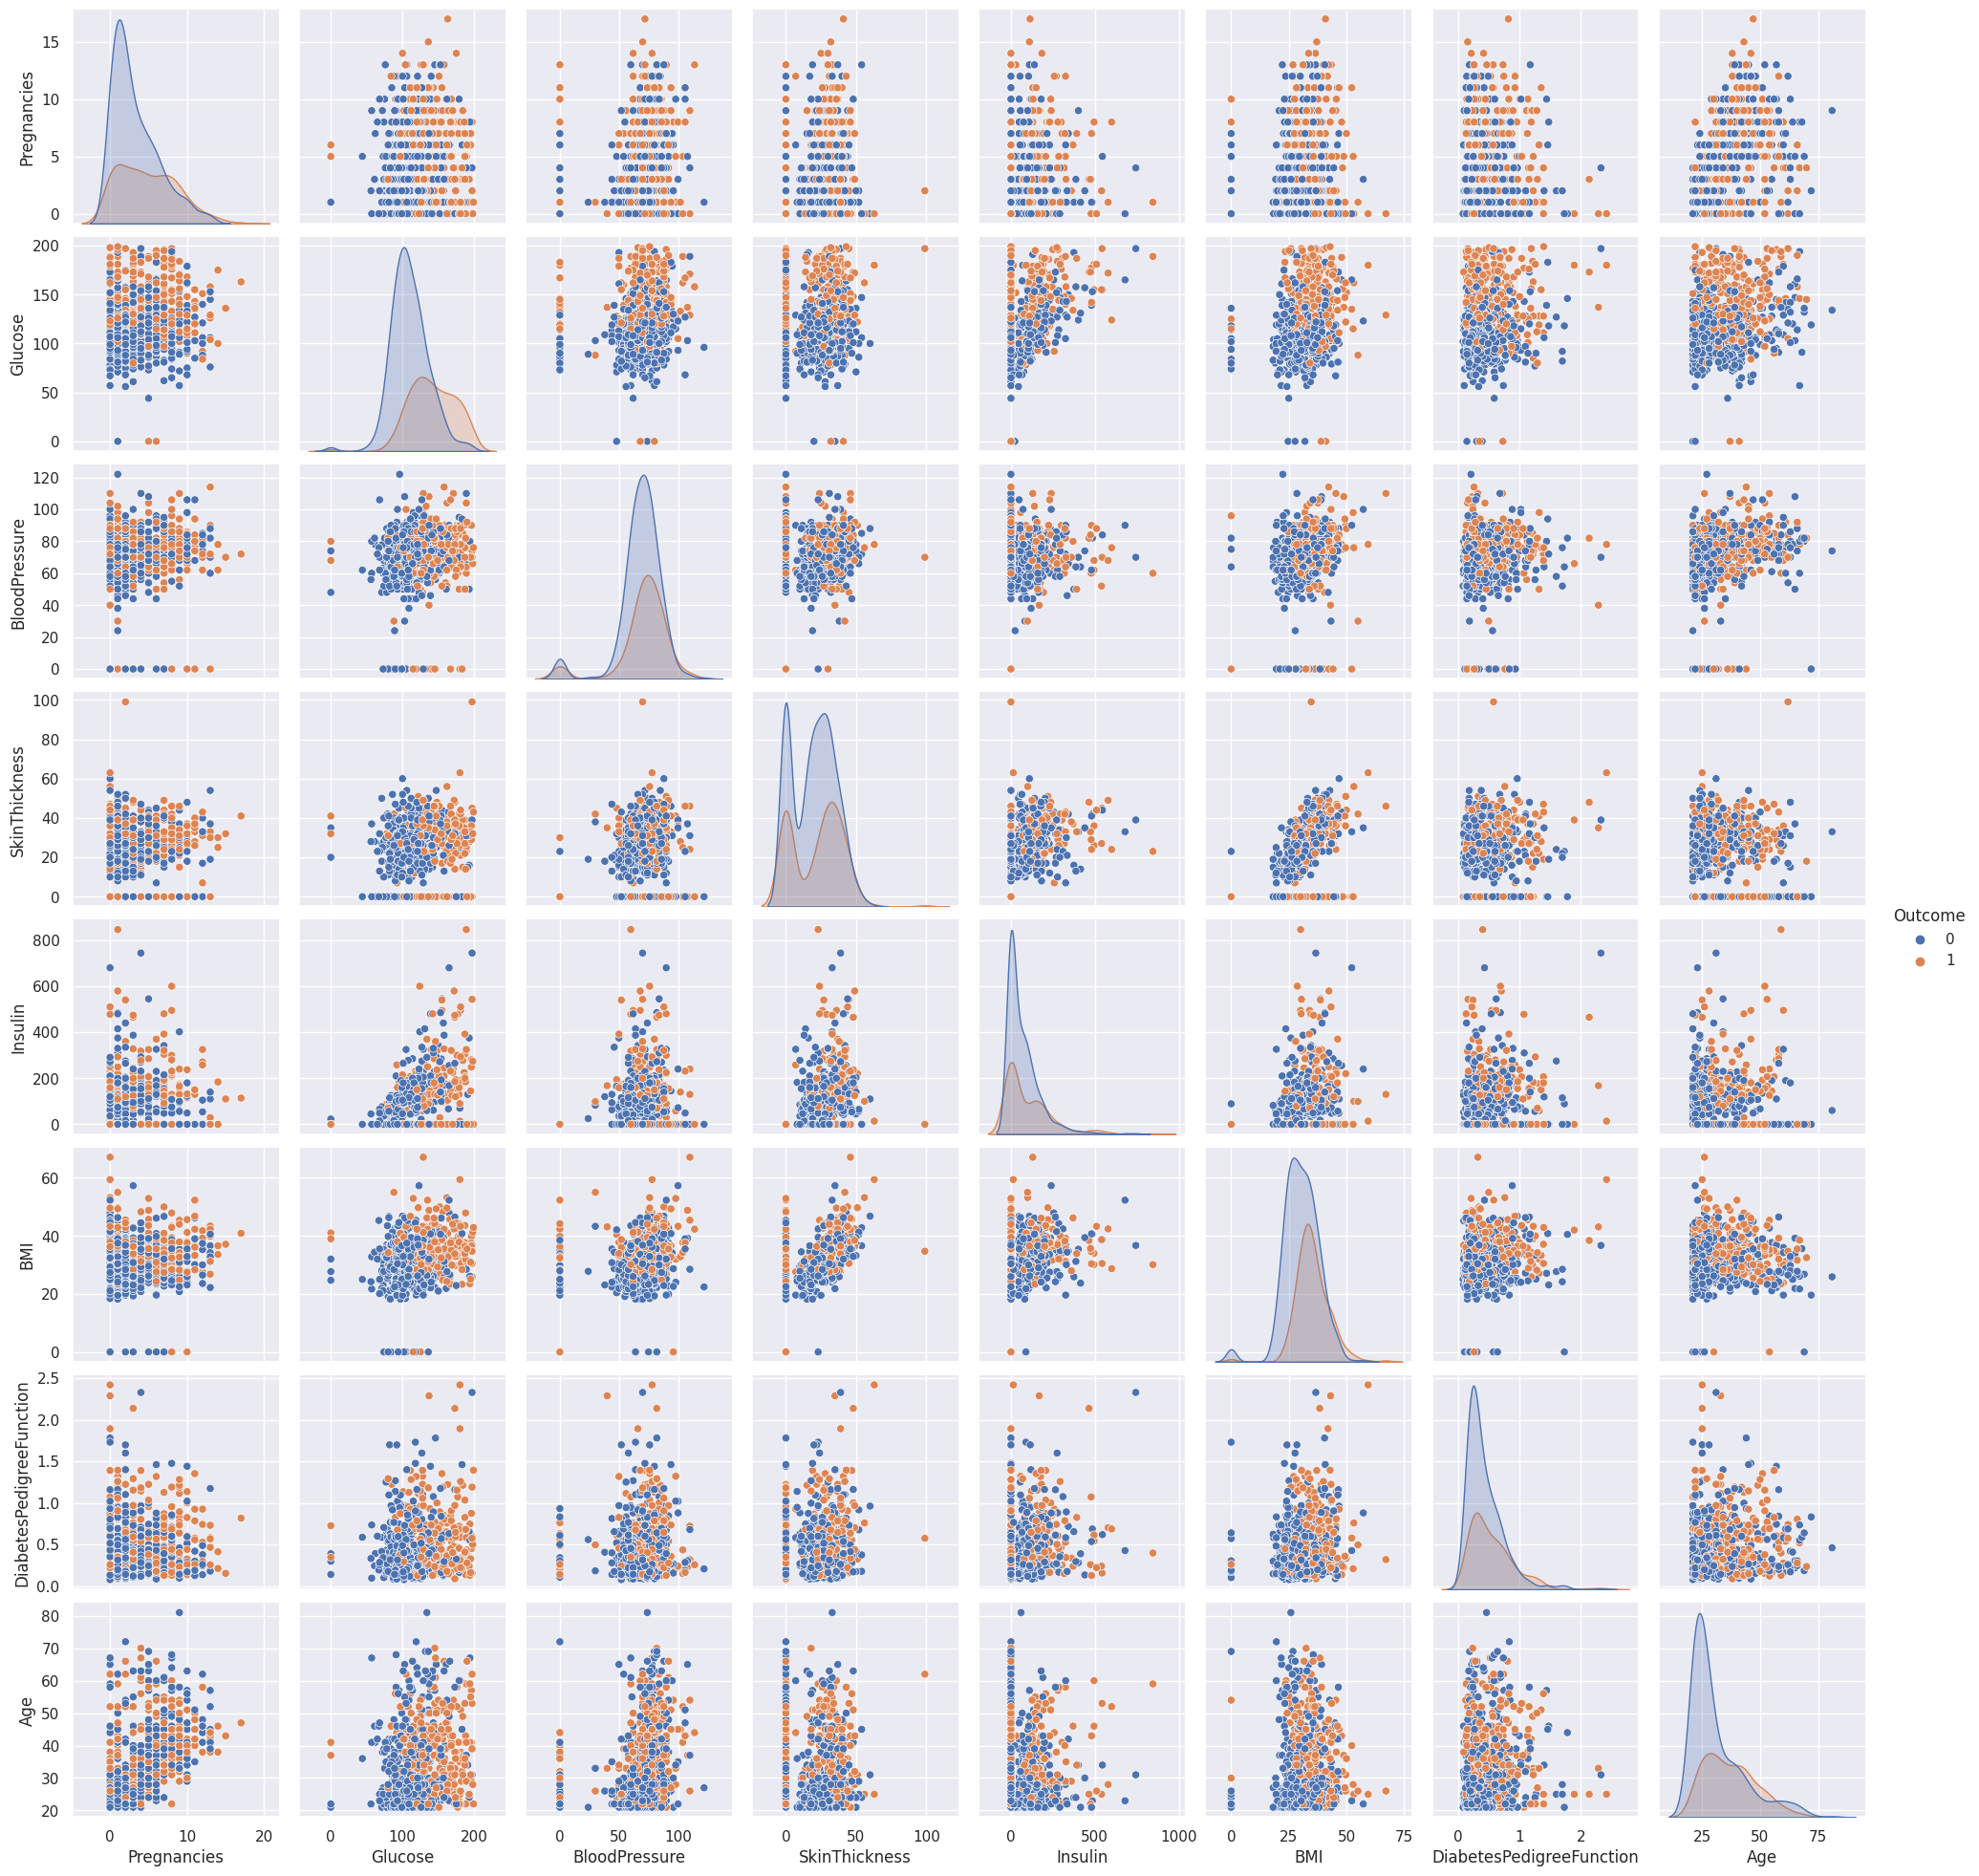

In [ ]:
sns.pairplot(df, hue='Outcome')
plt.show()

In [ ]:
X = df.drop(columns=['Outcome'])
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-6.476301e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,-9.251859e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,1.503427e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,1.006140e-16,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.006854e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.590520e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.451743e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.931325e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716


In [ ]:
observations = list(df.index)
variables = list(df.columns)

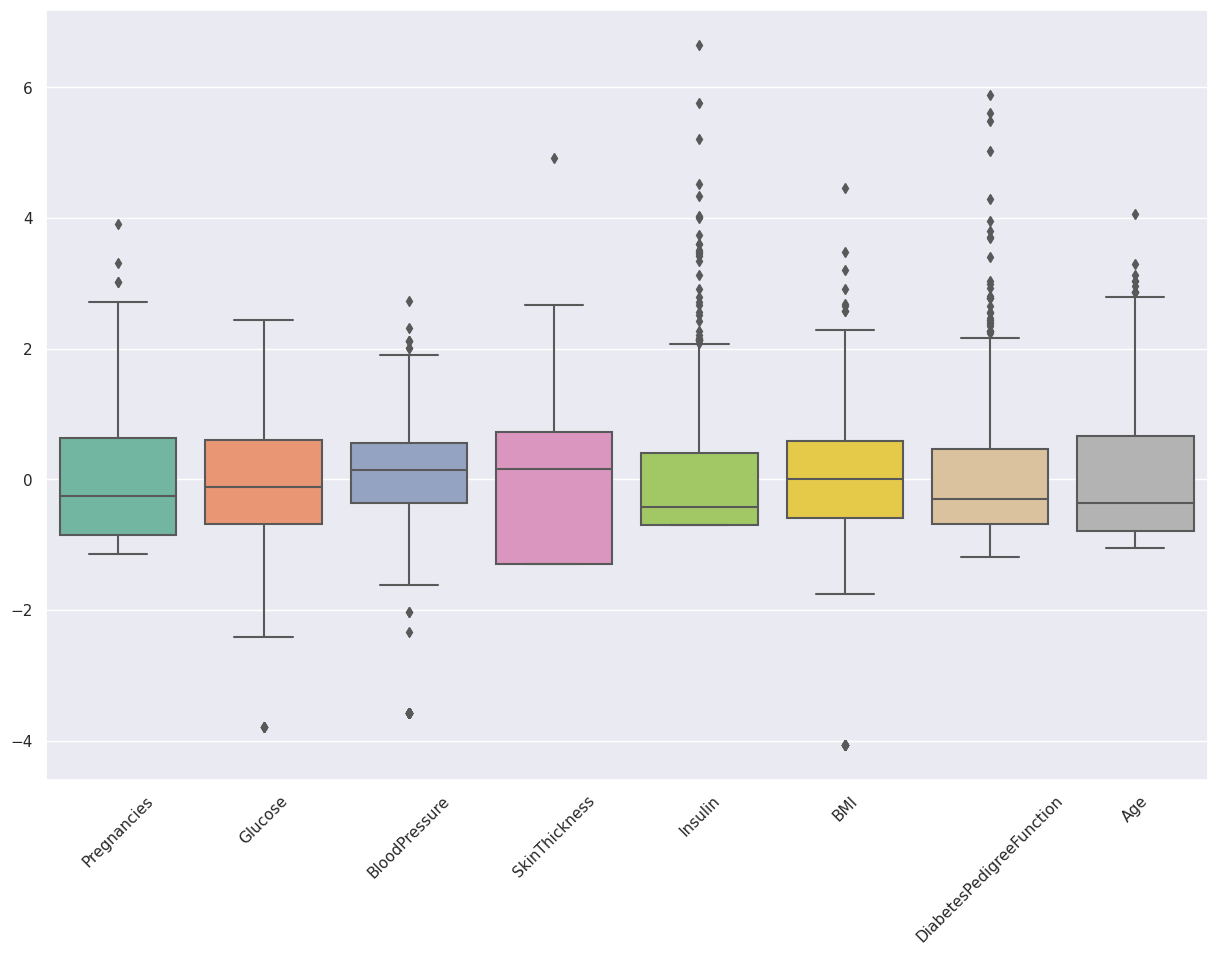

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

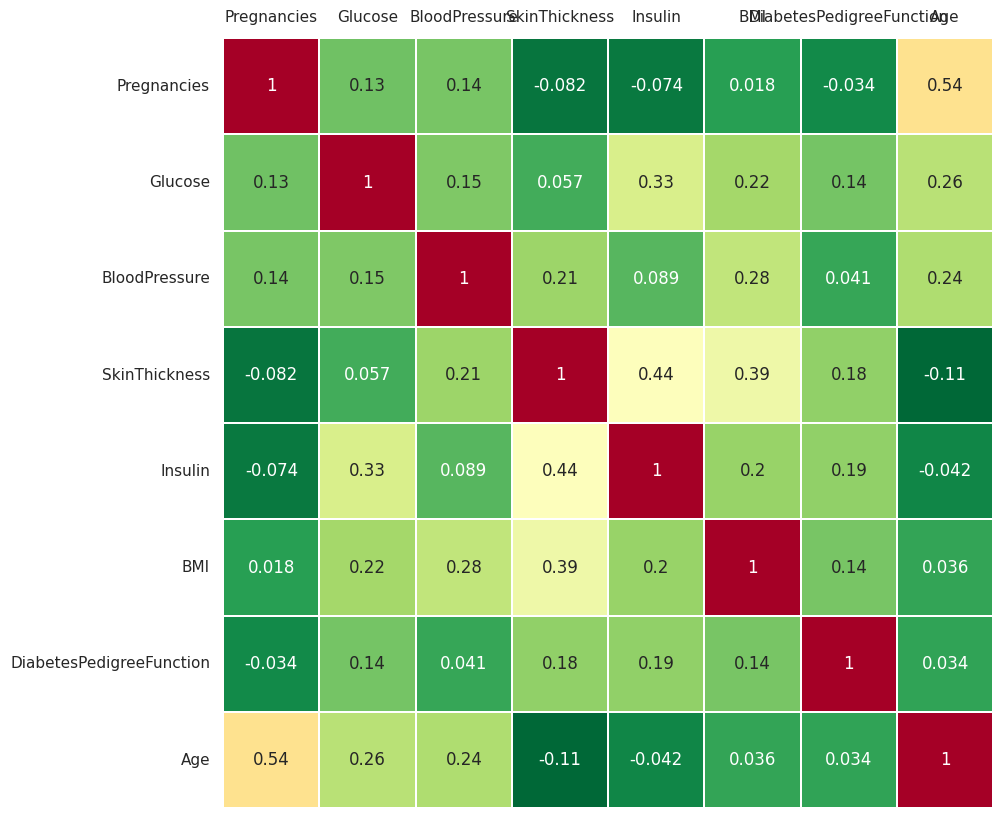

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

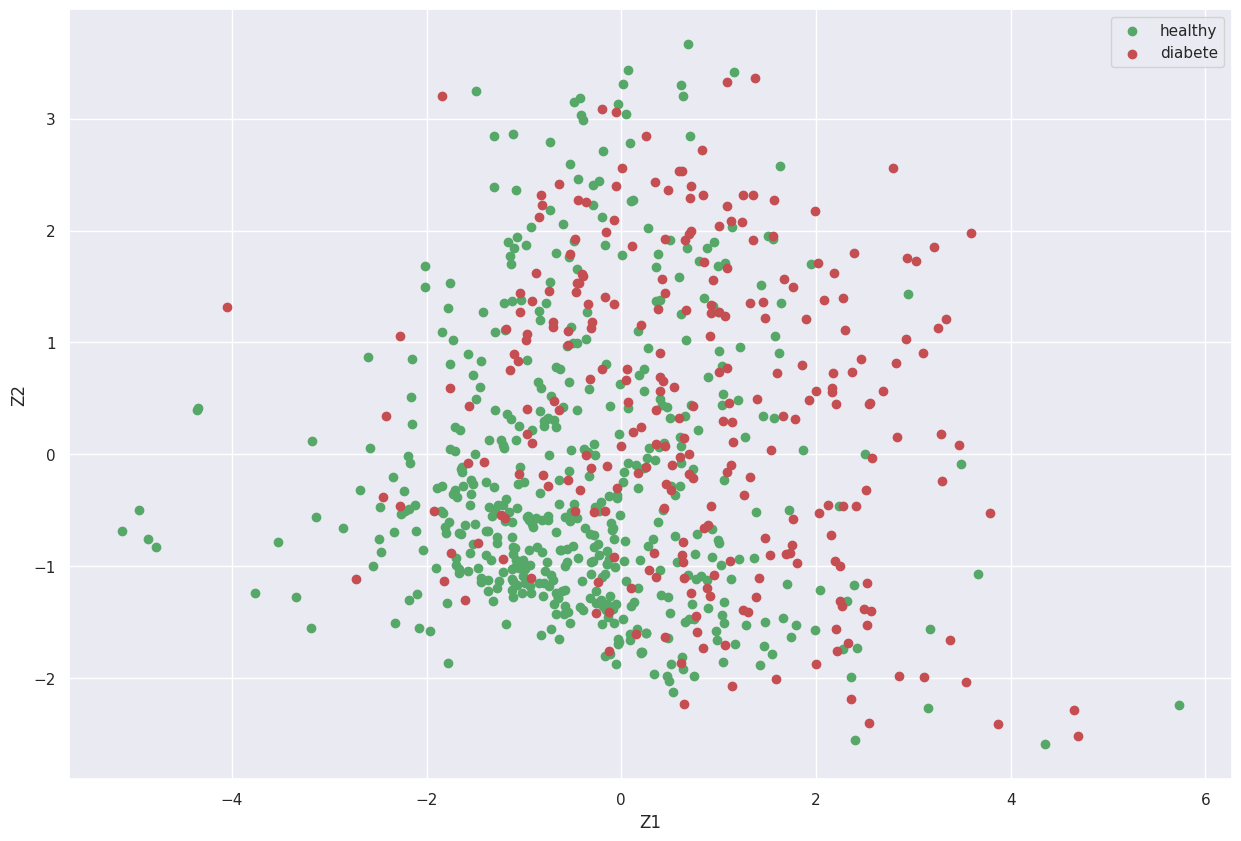

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)



idx_healthy= np.where(y == 0)
idx_diabete = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='g', label='healthy')
plt.scatter(Z[idx_diabete,0], Z[idx_diabete,1], c='r', label='diabete')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')


array([[ 0.1284321 ,  0.59378583, -0.01308692,  0.08069115, -0.47560573,
         0.19359817, -0.58879003,  0.11784098],
       [ 0.39308257,  0.17402908,  0.46792282, -0.40432871,  0.46632804,
         0.09416176, -0.06015291,  0.45035526],
       [ 0.36000261,  0.18389207, -0.53549442,  0.05598649,  0.32795306,
        -0.6341159 , -0.19211793, -0.01129554],
       [ 0.43982428, -0.33196534, -0.2376738 ,  0.03797608, -0.48786206,
         0.00958944,  0.28221253,  0.5662838 ],
       [ 0.43502617, -0.25078106,  0.33670893, -0.34994376, -0.34693481,
        -0.27065061, -0.13200992, -0.54862138],
       [ 0.45194134, -0.1009598 , -0.36186463,  0.05364595,  0.25320376,
         0.68537218, -0.03536644, -0.34151764],
       [ 0.27061144, -0.122069  ,  0.43318905,  0.8336801 ,  0.11981049,
        -0.08578409, -0.08609107, -0.00825873],
       [ 0.19802707,  0.62058853,  0.07524755,  0.0712006 , -0.10928996,
        -0.03335717,  0.71208542, -0.21166198]])

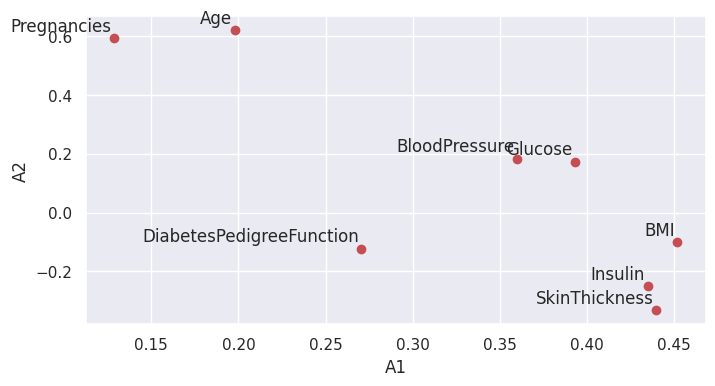

In [ ]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


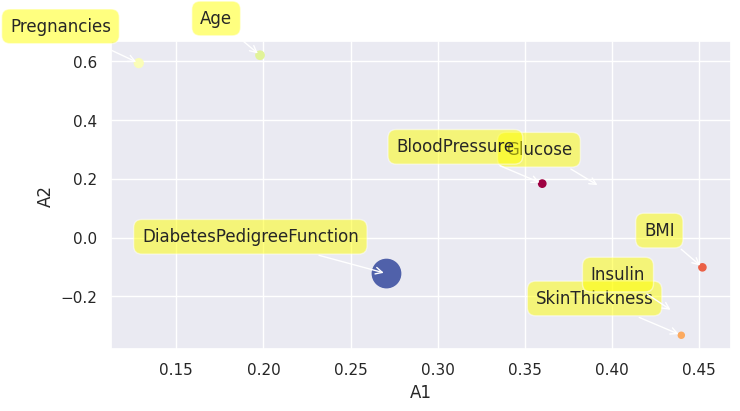

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

array([2.09711056, 1.73346726, 1.03097228, 0.87667054, 0.76333832,
       0.68351839, 0.42036353, 0.40498938])

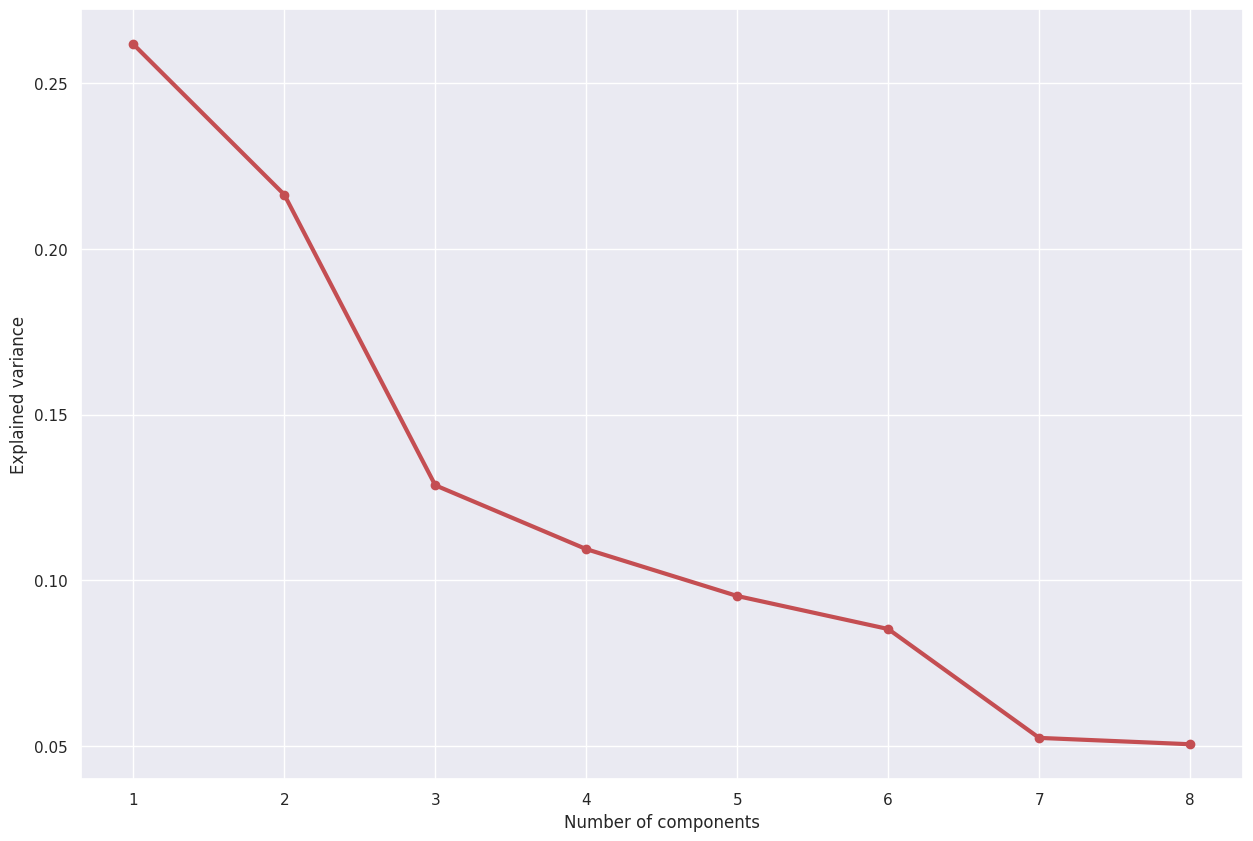

In [ ]:
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

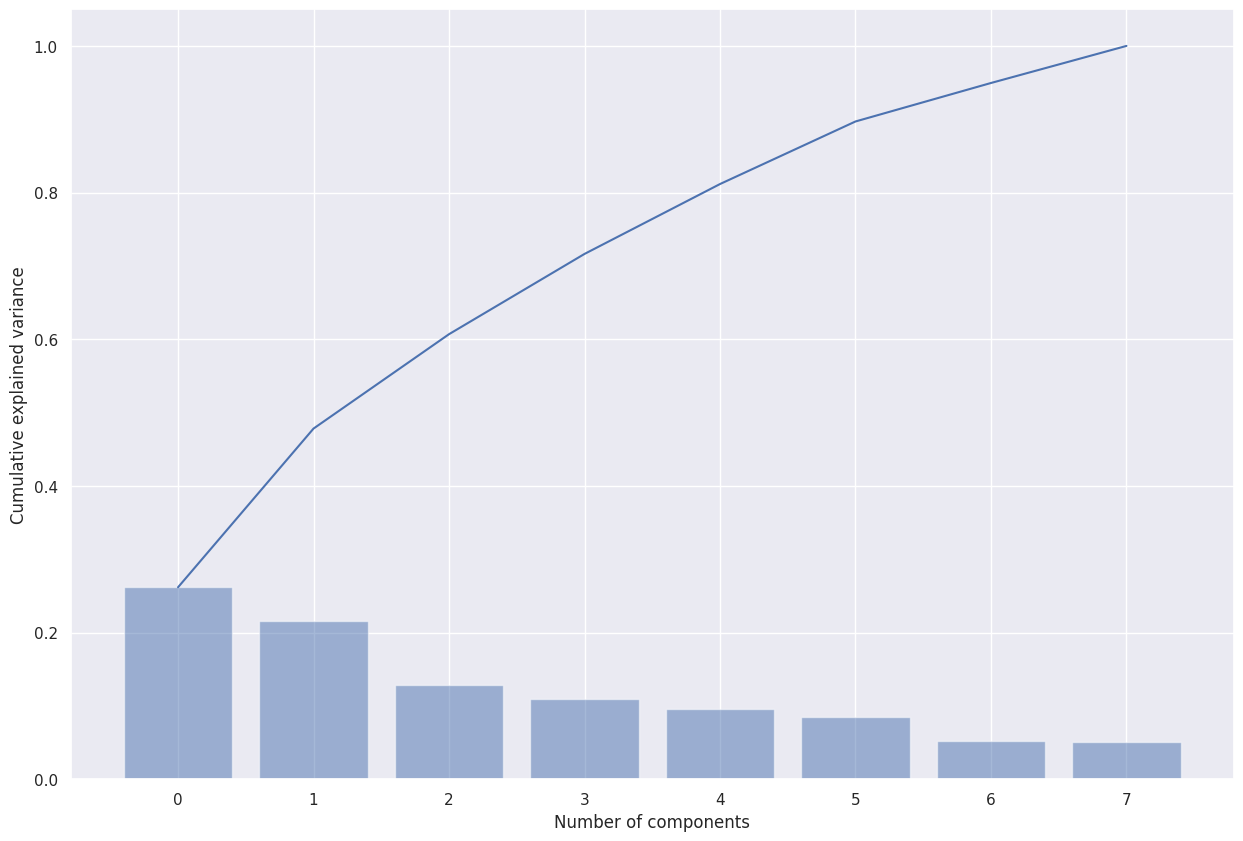

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([ 1.23489499e+00, -7.33851670e-01,  1.59587594e+00, -1.27124099e+00,
       -2.18481921e+00,  8.35577116e-01, -1.10793965e+00,  8.55901880e-01,
       -2.42154631e-01,  3.20666064e+00,  6.47607201e-01,  1.92893021e+00,
        2.84892093e+00, -5.25323102e-01,  1.27621089e+00,  3.42493523e-01,
       -1.75473191e+00,  1.12123694e+00, -1.39264766e+00, -8.77617587e-01,
       -1.21440866e+00,  2.22863124e+00,  2.08281251e+00,  7.66243412e-01,
        2.17408978e+00,  1.44531562e+00,  1.86508824e+00, -1.16362532e+00,
        3.29815284e+00,  1.27552716e+00,  1.58922844e+00, -9.74579208e-01,
       -6.04866817e-01,  1.02453736e+00,  1.79421221e+00, -7.53028302e-01,
        2.11832390e+00,  1.29347684e+00, -1.19787066e+00, -2.92358442e-02,
       -2.81250376e-01,  1.37596920e+00,  1.90518470e+00,  1.98224820e+00,
        1.79807684e+00, -1.68362998e+00, -1.16650347e-01, -1.13391084e+00,
        2.02132477e-01,  3.97693610e-01, -7.41043284e-01, -8.83460815e-01,
        8.30354938e-02,  

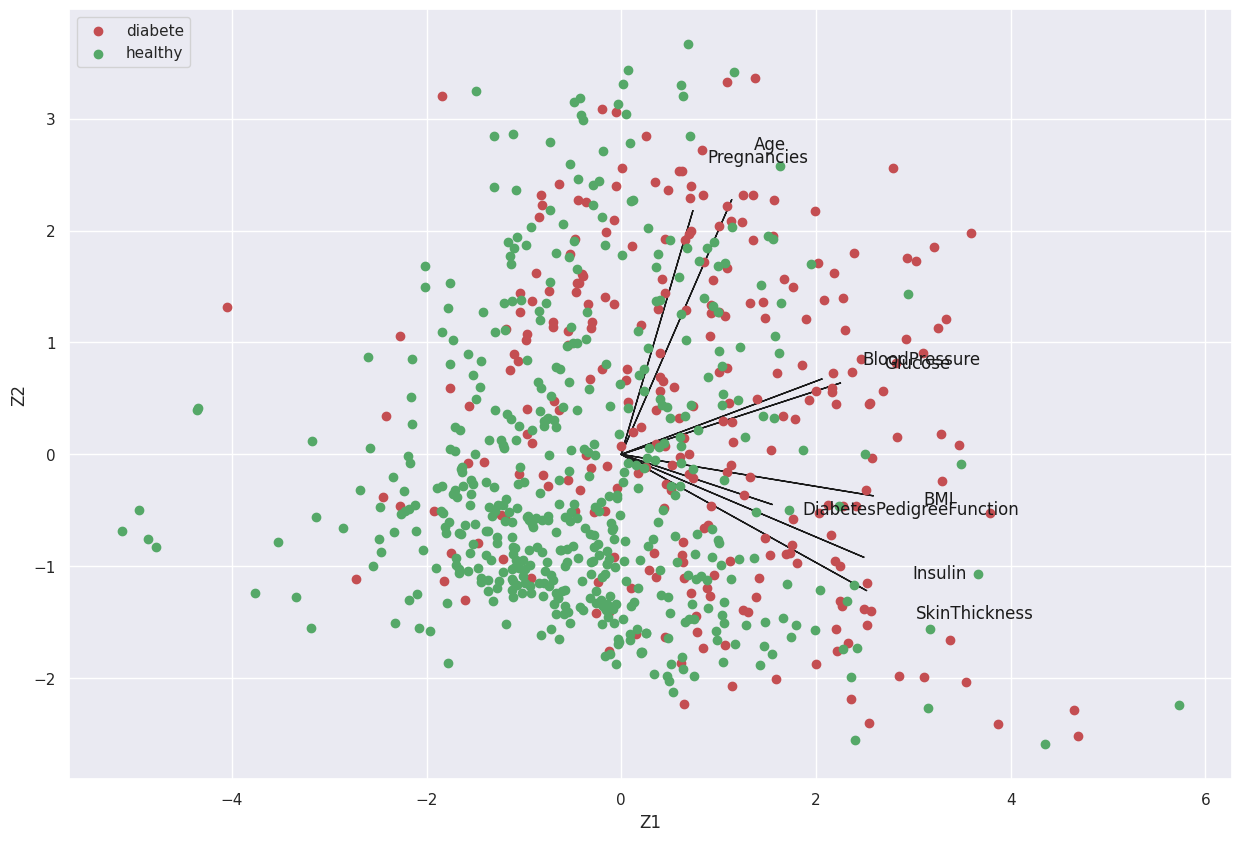

In [ ]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_diabete,0], Z[idx_diabete,1], c='r', label='diabete')
plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='g', label='healthy')

plt.legend(loc='upper left')
Z1
Z2


In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352
...,...,...,...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527,-0.077322,1.141357,-0.138590
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290,0.529339,0.152109,0.467532
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009,-0.538270,-0.335563,0.289439
766,-1.060324,0.837062,0.425030,-0.204493,0.957593,0.153307,1.180308,-0.534344


In [ ]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Pregnancies,0.128432,0.593786,-0.013087,0.080691,-0.475606,0.193598,-0.588790,0.117841
Glucose,0.393083,0.174029,0.467923,-0.404329,0.466328,0.094162,-0.060153,0.450355
BloodPressure,0.360003,0.183892,-0.535494,0.055986,0.327953,-0.634116,-0.192118,-0.011296
SkinThickness,0.439824,-0.331965,-0.237674,0.037976,-0.487862,0.009589,0.282213,0.566284
Insulin,0.435026,-0.250781,0.336709,-0.349944,-0.346935,-0.270651,-0.132010,-0.548621
BMI,0.451941,-0.100960,-0.361865,0.053646,0.253204,0.685372,-0.035366,-0.341518
DiabetesPedigreeFunction,0.270611,-0.122069,0.433189,0.833680,0.119810,-0.085784,-0.086091,-0.008259
Age,0.198027,0.620589,0.075248,0.071201,-0.109290,-0.033357,0.712085,-0.211662


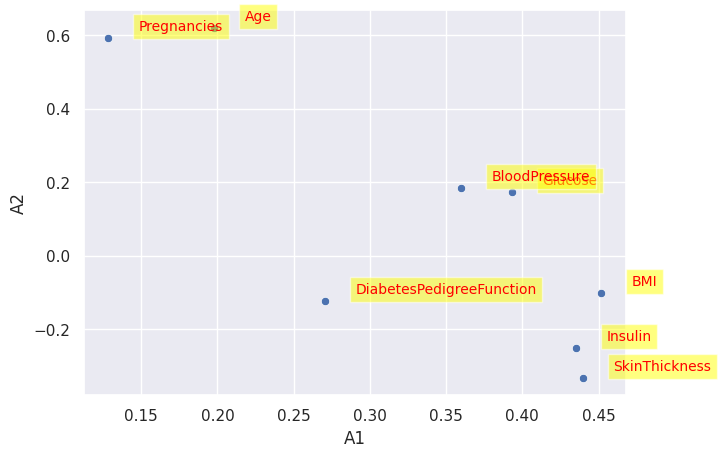

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

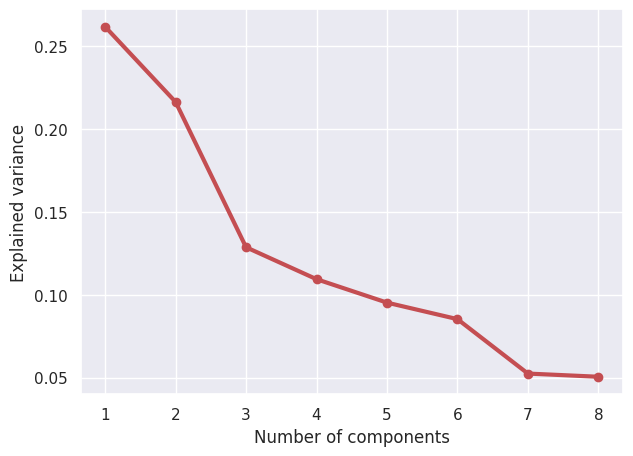

In [ ]:

VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

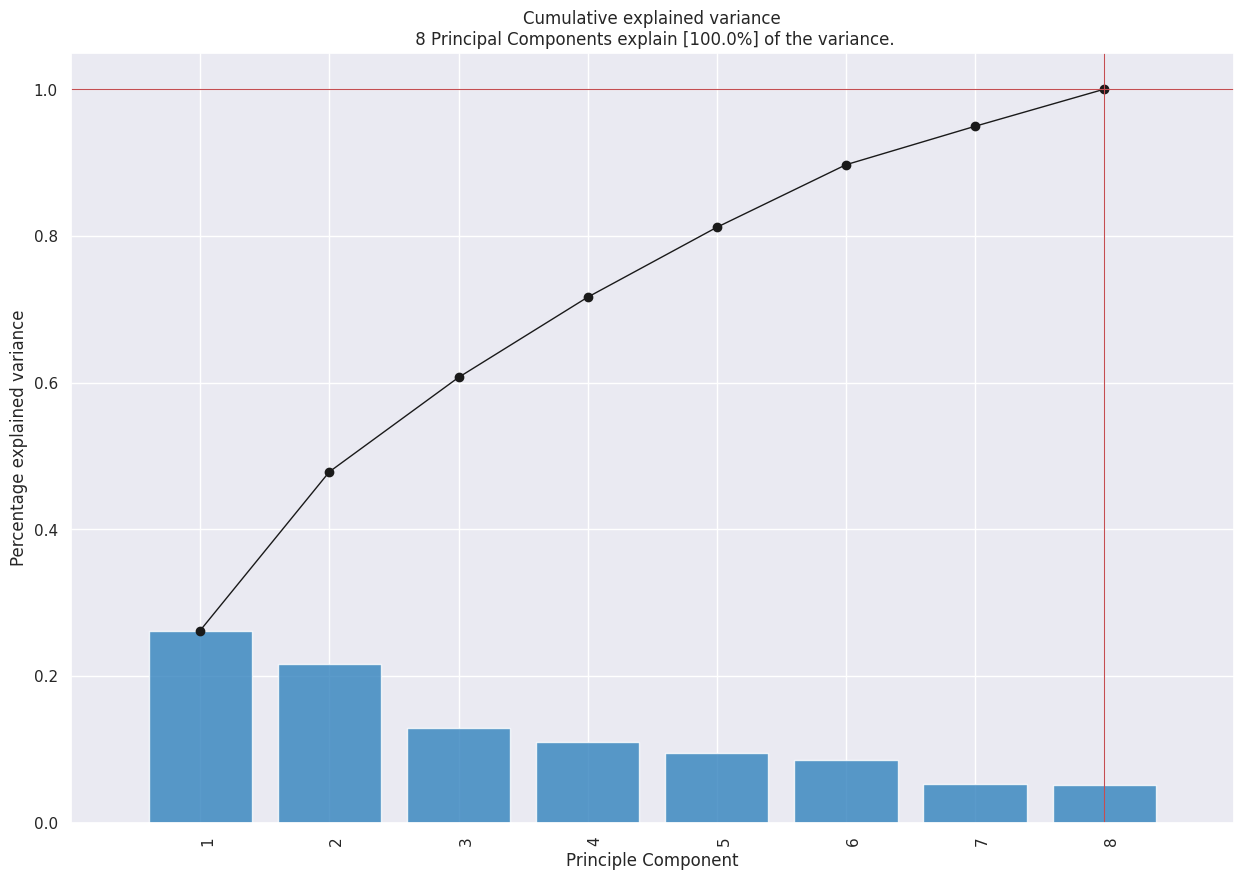

In [ ]:
model.plot();

In [ ]:
from pycaret.utils import version
version()

'3.2.0'

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (691, 9)
Unseen Data For Predictions: (77, 9)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Outcome', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(691, 9)"
4,Transformed data shape,"(691, 9)"
5,Transformed train set shape,"(483, 9)"
6,Transformed test set shape,"(208, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7658,0.8124,0.5768,0.6880,0.6167,0.4536,0.4644,0.4920
gbc,Gradient Boosting Classifier,0.7658,0.8223,0.6070,0.6785,0.6351,0.4646,0.4707,0.2680
lr,Logistic Regression,0.7616,0.8198,0.5463,0.6940,0.5959,0.4353,0.4503,1.0720
lda,Linear Discriminant Analysis,0.7616,0.8164,0.5522,0.6930,0.5991,0.4373,0.4519,0.0440
ridge,Ridge Classifier,0.7595,0.0000,0.5463,0.6900,0.5939,0.4314,0.4463,0.0530
ada,Ada Boost Classifier,0.7494,0.7968,0.5721,0.6672,0.6051,0.4256,0.4353,0.4430
qda,Quadratic Discriminant Analysis,0.7452,0.8067,0.5533,0.6535,0.5941,0.4118,0.4179,0.0470
et,Extra Trees Classifier,0.7452,0.8075,0.5364,0.6648,0.5826,0.4056,0.4163,0.3300
xgboost,Extreme Gradient Boosting,0.7411,0.7881,0.5835,0.6345,0.6056,0.4139,0.4163,0.1890
nb,Naive Bayes,0.7408,0.8080,0.5945,0.6265,0.6006,0.4120,0.4182,0.1010


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [ ]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8163,0.8989,0.7647,0.7222,0.7429,0.6002,0.6008
1,0.8776,0.9191,0.9412,0.7619,0.8421,0.7439,0.7550
2,0.7551,0.7335,0.5294,0.6923,0.6000,0.4280,0.4360
3,0.7292,0.7695,0.4375,0.6364,0.5185,0.3390,0.3505
4,0.7500,0.7383,0.5625,0.6429,0.6000,0.4194,0.4213
5,0.7708,0.8613,0.5000,0.7273,0.5926,0.4407,0.4556
6,0.7083,0.7617,0.3750,0.6000,0.4615,0.2759,0.2902
7,0.7292,0.8539,0.2941,0.8333,0.4348,0.3067,0.3787
8,0.7292,0.8140,0.4706,0.6667,0.5517,0.3659,0.3772


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lda=tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7959,0.8879,0.5882,0.7692,0.6667,0.5233,0.5331
1,0.8571,0.9007,0.7647,0.8125,0.7879,0.6803,0.6810
2,0.7551,0.7445,0.4706,0.7273,0.5714,0.4108,0.4299
3,0.8125,0.7676,0.6250,0.7692,0.6897,0.5574,0.5635
4,0.7708,0.6934,0.4375,0.7778,0.5600,0.4211,0.4529
5,0.7500,0.8262,0.3750,0.7500,0.5000,0.3571,0.3953
6,0.7500,0.7051,0.4375,0.7000,0.5385,0.3793,0.3990
7,0.7292,0.8311,0.2353,1.0000,0.3810,0.2844,0.4072
8,0.7500,0.7913,0.2941,1.0000,0.4545,0.3499,0.4605


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.4, solver='lsqr',
                           store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8163,0.0000,0.7647,0.7222,0.7429,0.6002,0.6008
1,0.8776,0.0000,0.9412,0.7619,0.8421,0.7439,0.7550
2,0.7551,0.0000,0.5294,0.6923,0.6000,0.4280,0.4360
3,0.7292,0.0000,0.4375,0.6364,0.5185,0.3390,0.3505
4,0.7500,0.0000,0.5625,0.6429,0.6000,0.4194,0.4213
5,0.7708,0.0000,0.5000,0.7273,0.5926,0.4407,0.4556
6,0.7083,0.0000,0.3750,0.6000,0.4615,0.2759,0.2902
7,0.7292,0.0000,0.2941,0.8333,0.4348,0.3067,0.3787
8,0.7083,0.0000,0.4118,0.6364,0.5000,0.3072,0.3217


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8163,0.0000,0.7647,0.7222,0.7429,0.6002,0.6008
1,0.8776,0.0000,0.9412,0.7619,0.8421,0.7439,0.7550
2,0.7551,0.0000,0.5294,0.6923,0.6000,0.4280,0.4360
3,0.7292,0.0000,0.4375,0.6364,0.5185,0.3390,0.3505
4,0.7500,0.0000,0.5625,0.6429,0.6000,0.4194,0.4213
5,0.7708,0.0000,0.5000,0.7273,0.5926,0.4407,0.4556
6,0.7083,0.0000,0.3750,0.6000,0.4615,0.2759,0.2902
7,0.7292,0.0000,0.2941,0.8333,0.4348,0.3067,0.3787
8,0.7292,0.0000,0.4706,0.6667,0.5517,0.3659,0.3772


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_ridge

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [ ]:
evaluate_model(tuned_ridge)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
et=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7347,0.8594,0.5882,0.6250,0.6061,0.4063,0.4068
1,0.8776,0.9412,0.8824,0.7895,0.8333,0.7370,0.7399
2,0.7143,0.8208,0.5294,0.6000,0.5625,0.3516,0.3531
3,0.7500,0.7686,0.5000,0.6667,0.5714,0.4000,0.4082
4,0.7292,0.7236,0.5625,0.6000,0.5806,0.3810,0.3814
5,0.7500,0.8164,0.5625,0.6429,0.6000,0.4194,0.4213
6,0.7708,0.7393,0.5625,0.6923,0.6207,0.4590,0.4641
7,0.7292,0.7638,0.2941,0.8333,0.4348,0.3067,0.3787
8,0.7083,0.8292,0.4706,0.6154,0.5333,0.3267,0.3329


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et=tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7959,0.8860,0.8824,0.6522,0.7500,0.5840,0.6031
1,0.8367,0.9301,0.8824,0.7143,0.7895,0.6585,0.6683
2,0.7551,0.8438,0.6471,0.6471,0.6471,0.4596,0.4596
3,0.7500,0.7871,0.7500,0.6000,0.6667,0.4706,0.4781
4,0.7083,0.7344,0.6250,0.5556,0.5882,0.3636,0.3651
5,0.8125,0.8535,0.6875,0.7333,0.7097,0.5714,0.5721
6,0.7500,0.7520,0.6250,0.6250,0.6250,0.4375,0.4375
7,0.7500,0.8273,0.5294,0.6923,0.6000,0.4228,0.4309
8,0.8333,0.8805,0.7647,0.7647,0.7647,0.6357,0.6357


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:

tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_samples_leaf=4, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
clf_pca = setup(data=data, target='Outcome', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components =3)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(691, 9)"
4,Transformed data shape,"(691, 4)"
5,Transformed train set shape,"(483, 4)"
6,Transformed test set shape,"(208, 4)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7182,0.7867,0.4930,0.6224,0.5346,0.3418,0.3538,0.0650
ridge,Ridge Classifier,0.7161,0.0000,0.4688,0.6221,0.5192,0.3292,0.3425,0.1140
et,Extra Trees Classifier,0.7141,0.7403,0.4930,0.5939,0.5331,0.3328,0.3379,0.3410
lr,Logistic Regression,0.7119,0.7871,0.4684,0.6139,0.5170,0.3221,0.3346,0.0770
rf,Random Forest Classifier,0.7080,0.7433,0.4945,0.5803,0.5271,0.3225,0.3266,0.4520
gbc,Gradient Boosting Classifier,0.7078,0.7442,0.5066,0.5882,0.5374,0.3290,0.3338,0.2400
nb,Naive Bayes,0.7057,0.7790,0.4265,0.5987,0.4875,0.2949,0.3064,0.1500
knn,K Neighbors Classifier,0.7056,0.7460,0.5055,0.5816,0.5372,0.3247,0.3285,0.1850
lightgbm,Light Gradient Boosting Machine,0.7037,0.7288,0.5368,0.5751,0.5501,0.3314,0.3350,0.4970
ada,Ada Boost Classifier,0.7017,0.7302,0.5059,0.5826,0.5334,0.3182,0.3247,0.3990


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [ ]:
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7755,0.8750,0.5882,0.7143,0.6452,0.4832,0.4881
1,0.7959,0.8640,0.6471,0.7333,0.6875,0.5369,0.5392
2,0.6735,0.8309,0.4706,0.5333,0.5000,0.2590,0.2601
3,0.7292,0.7617,0.4375,0.6364,0.5185,0.3390,0.3505
4,0.7083,0.6914,0.4375,0.5833,0.5000,0.3000,0.3062
5,0.7292,0.7676,0.4375,0.6364,0.5185,0.3390,0.3505
6,0.6667,0.7129,0.3125,0.5000,0.3846,0.1724,0.1814
7,0.6667,0.8008,0.1765,0.6000,0.2727,0.1332,0.1753
8,0.7500,0.8083,0.4118,0.7778,0.5385,0.3885,0.4255


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lda_pca = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7755,0.8750,0.5882,0.7143,0.6452,0.4832,0.4881
1,0.8163,0.8824,0.7059,0.7500,0.7273,0.5890,0.5896
2,0.6939,0.8290,0.5294,0.5625,0.5455,0.3150,0.3153
3,0.6875,0.7480,0.4375,0.5385,0.4828,0.2623,0.2652
4,0.7083,0.6914,0.4375,0.5833,0.5000,0.3000,0.3062
5,0.7292,0.7656,0.5625,0.6000,0.5806,0.3810,0.3814
6,0.6250,0.7305,0.3750,0.4286,0.4000,0.1290,0.1296
7,0.6667,0.8027,0.1765,0.6000,0.2727,0.1332,0.1753
8,0.7708,0.8083,0.4118,0.8750,0.5600,0.4310,0.4870


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lda_pca = tune_model(lda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7755,0.8750,0.5882,0.7143,0.6452,0.4832,0.4881
1,0.7959,0.8640,0.6471,0.7333,0.6875,0.5369,0.5392
2,0.6735,0.8309,0.4706,0.5333,0.5000,0.2590,0.2601
3,0.7292,0.7617,0.4375,0.6364,0.5185,0.3390,0.3505
4,0.7083,0.6914,0.4375,0.5833,0.5000,0.3000,0.3062
5,0.7292,0.7676,0.4375,0.6364,0.5185,0.3390,0.3505
6,0.6667,0.7129,0.3125,0.5000,0.3846,0.1724,0.1814
7,0.6667,0.8008,0.1765,0.6000,0.2727,0.1332,0.1753
8,0.7500,0.8083,0.4118,0.7778,0.5385,0.3885,0.4255


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:

tuned_lda_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.7, solver='lsqr',
                           store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_lda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
ridge_pca = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7755,0.0000,0.5882,0.7143,0.6452,0.4832,0.4881
1,0.7959,0.0000,0.6471,0.7333,0.6875,0.5369,0.5392
2,0.7143,0.0000,0.5294,0.6000,0.5625,0.3516,0.3531
3,0.6667,0.0000,0.3750,0.5000,0.4286,0.2000,0.2041
4,0.7083,0.0000,0.4375,0.5833,0.5000,0.3000,0.3062
5,0.7083,0.0000,0.5000,0.5714,0.5333,0.3226,0.3241
6,0.6458,0.0000,0.3750,0.4615,0.4138,0.1639,0.1657
7,0.6667,0.0000,0.1765,0.6000,0.2727,0.1332,0.1753
8,0.7500,0.0000,0.3529,0.8571,0.5000,0.3698,0.4346


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_ridge_pca = tune_model(ridge_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7755,0.0000,0.5882,0.7143,0.6452,0.4832,0.4881
1,0.7959,0.0000,0.6471,0.7333,0.6875,0.5369,0.5392
2,0.7143,0.0000,0.5294,0.6000,0.5625,0.3516,0.3531
3,0.6667,0.0000,0.3750,0.5000,0.4286,0.2000,0.2041
4,0.7083,0.0000,0.4375,0.5833,0.5000,0.3000,0.3062
5,0.7083,0.0000,0.5000,0.5714,0.5333,0.3226,0.3241
6,0.6667,0.0000,0.3750,0.5000,0.4286,0.2000,0.2041
7,0.6667,0.0000,0.1765,0.6000,0.2727,0.1332,0.1753
8,0.7500,0.0000,0.3529,0.8571,0.5000,0.3698,0.4346


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_ridge_pca

RidgeClassifier(alpha=5.62, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [ ]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7978,0.5882,0.5882,0.5882,0.3695,0.3695
1,0.8163,0.8621,0.7647,0.7222,0.7429,0.6002,0.6008
2,0.7143,0.6939,0.4118,0.6364,0.5000,0.3126,0.3271
3,0.6667,0.7393,0.3125,0.5000,0.3846,0.1724,0.1814
4,0.7292,0.6514,0.5000,0.6154,0.5517,0.3607,0.3646
5,0.7292,0.7920,0.5000,0.6154,0.5517,0.3607,0.3646
6,0.7500,0.6963,0.5000,0.6667,0.5714,0.4000,0.4082
7,0.6042,0.6822,0.2353,0.4000,0.2963,0.0460,0.0492
8,0.7083,0.7552,0.4706,0.6154,0.5333,0.3267,0.3329


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7755,0.8456,0.4706,0.8000,0.5926,0.4517,0.4820
1,0.7551,0.8603,0.4706,0.7273,0.5714,0.4108,0.4299
2,0.7347,0.8070,0.4118,0.7000,0.5185,0.3520,0.3756
3,0.7083,0.7266,0.3750,0.6000,0.4615,0.2759,0.2902
4,0.7292,0.6797,0.4375,0.6364,0.5185,0.3390,0.3505
5,0.7708,0.7852,0.5000,0.7273,0.5926,0.4407,0.4556
6,0.6875,0.7051,0.3750,0.5455,0.4444,0.2373,0.2453
7,0.6667,0.7818,0.1765,0.6000,0.2727,0.1332,0.1753
8,0.7292,0.8178,0.2353,1.0000,0.3810,0.2844,0.4072


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_samples_leaf=5,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=150, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…